In [1]:
# import libraries
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

# dataset and dataloader
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform = transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform = transform)

BATCH_SIZE = 64
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)
testloader = DataLoader(testset, batch_size = BATCH_SIZE, shuffle = False)

/home/connectome/ahhyun724/.conda/envs/3D_CNN_woPip/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 위의 형태로부터 dataset 이 어떻게 생겼는지 확인해야 -> CustomDataset 을 만들 수 있음
print(trainloader.dataset)
print("data shape: ", trainloader.dataset.data.shape)
print("target shape: ", trainloader.dataset.targets.shape)
print(trainloader.dataset.targets[:10])
print(trainloader.dataset.data[1].shape)
print(trainloader.dataset.data[1])
print(trainloader.dataset.data[1][1].shape)
print(trainloader.dataset.data[1][1])



Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
data shape:  torch.Size([60000, 28, 28])
target shape:  torch.Size([60000])
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])
torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,

torch.Size([28, 28])


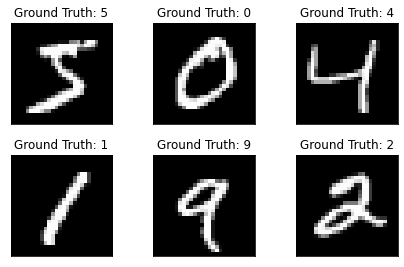

In [25]:
print(trainloader.dataset.data[0].shape) #first image
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(trainloader.dataset.data[i], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(trainloader.dataset.targets[i]))
  plt.xticks([])
  plt.yticks([])

In [10]:

print(trainloader.dataset.data.shape)
print(trainloader.dataset.targets.shape)
print(len(trainloader.dataset.data))
print(len(trainloader.dataset.targets))



torch.Size([60000, 28, 28])
torch.Size([60000])
60000
60000


In [30]:
trainloader.dataset[0] #tuple
trainloader.dataset[0][0] #first image
trainloader.dataset[0][1] #first label
trainloader.dataset.data[0] #first image
trainloader.dataset.targets[0] #first label

print(trainloader.dataset[0][0].shape) #first image "TRANSFORMED" by dataloader
# print(trainloader.dataset[0][1].shape) #first label => int "TRANSFORMED" by dataloader
print(trainloader.dataset.data[0].shape) #first image "RAW"
print(trainloader.dataset.targets[0].shape) #first label "RAW"

print(trainloader.dataset[0][0].dtype) #first image
#print(trainloader.dataset[0][1].dtype) #first label => int
print(trainloader.dataset.data[0].dtype) #first image
print(trainloader.dataset.targets[0].dtype) #first label


# first index of the dataset ;  image
# [0][0] -> image, first
# [0][1] -> label, first
# [1][0] -> image, second
# [1][1] -> label, second

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([])
torch.float32
torch.uint8
torch.int64


In [31]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
# Make CustomDataset to check whether downloading is properly done + collate function
    def __init__(self):
        x_data = trainloader.dataset.data
        y_data = trainloader.dataset.targets
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
    
    def __collate_fn__(self, batch):
        return torch.stack(batch)


In [32]:
from torch.utils.data import Dataset, DataLoader

# below followed copilot
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    def collate_fn(self, batch):
        return torch.stack(batch)




# START FROM HERE
### 1. Data set and Dataloaders

In [2]:
# start from here

# import libraries
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

# dataset and dataloader
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform = transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform = transform)

BATCH_SIZE = 64
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)
testloader = DataLoader(testset, batch_size = BATCH_SIZE, shuffle = False) 
# currently no collate_fn

### 2. Define model

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class MyNN(nn.Module):
    def __init__(self):
        super(MyNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32,10)

    def forward(self, x):
        #print(f"Input shape: {x.shape}")
        x = x.reshape(-1, 28*28)
            # -1 은 마지막 차원을 28*28 으로 만들기 위해 나머지는 알아서 차원 결정해줘~
        #print(f"Input shape: {x.shape}")
        #[batch_size, 1, 28, 28] -> [batch_size, 28*28]
        # 1: gray scale, 28:height, 28:width
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x


In [63]:
# 확인 위한 코드
model = MyNN()
output = model(trainloader.dataset[3][0])


In [4]:
# instantiation of MyNN

network = MyNN()
print(network)

MyNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


### 3. Define & Perform Train & Test

In [5]:
# define train function

def train(model, optim, loss_fn, train_loader, epochs, device):
    for epoch in range(epochs):
        train_loss = 0.0
        model.train() # turn the training mode on
        for batch in train_loader:
            data, target = batch
            data, target = data.to(device), target.to(device) # send to GPU

            # Compute gradient
            optim.zero_grad() # initialize the gradient
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optim.step()
            train_loss += loss.item()
            
        train_loss /= len(train_loader.dataset) # normalize training loss
        print(f"Epoch: {epoch}, Loss: {train_loss/len(train_loader)}")


In [6]:
# perform actual training

import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
#optimizer = torch.optim.Adam(network.parameters(), lr=0.001)
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()
trainloader = trainloader
EPOCH = 10
network.to(device) # send to GPU ; 이거 안 하면 model 이 서로 다른 device 에 있다고 그럼

train(network, optimizer, loss_fn, trainloader, EPOCH, device)


Epoch: 0, Loss: 2.521319267814602e-05
Epoch: 1, Loss: 6.5718342664611196e-06
Epoch: 2, Loss: 4.0878546034338715e-06
Epoch: 3, Loss: 2.9352267882399467e-06
Epoch: 4, Loss: 2.2981731053944823e-06
Epoch: 5, Loss: 1.8761121829099258e-06
Epoch: 6, Loss: 1.5963724451788251e-06
Epoch: 7, Loss: 1.3880269079851073e-06
Epoch: 8, Loss: 1.2108282335685047e-06
Epoch: 9, Loss: 1.0566750134082609e-06


In [7]:
def test(model,loss_fn, test_loader, device):
    model.eval()
    test_loss = 0.0
    correct = 0

    with torch.no_grad(): #if not, it will consume memory
        for batch in test_loader:
            data, target = batch
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True) #[batch_size, num_classes], argmax over num_classes
            correct += pred.eq(target.view_as(pred)).sum().item()
            # view as same dimension as target     
            # pred.eq(target.view_as(pred)) -> [batch_size, 1] -> True or False   
        print("loss: ", test_loss)
        test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss}, Accuracy: {correct}/{len(test_loader.dataset)} {100.*correct/len(test_loader.dataset)}%')



In [8]:
loss_fn = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


test(network, loss_fn, testloader, device)

loss:  13.976509554544464
Test Loss: 0.0013976509554544463, Accuracy: 9742/10000 97.42%


### 4. Save model

In [13]:
print(network)

print("=====parameters=====")
for name,weights in network.named_parameters():
    print("name: ", name)
    print("weights shape: ", weights.shape)
    print("weights: ", weights)
    print("==========")

MyNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)
=====parameters=====
name:  fc1.weight
weights shape:  torch.Size([128, 784])
weights:  Parameter containing:
tensor([[-0.0330, -0.0054, -0.0342,  ..., -0.0136, -0.0145,  0.0178],
        [ 0.0073, -0.0172, -0.0272,  ..., -0.0058, -0.0112,  0.0325],
        [-0.0269,  0.0244, -0.0231,  ...,  0.0094, -0.0296, -0.0269],
        ...,
        [ 0.0106,  0.0116, -0.0206,  ...,  0.0073,  0.0137, -0.0123],
        [-0.0319, -0.0137, -0.0115,  ..., -0.0051, -0.0015,  0.0027],
        [ 0.0312,  0.0069,  0.0099,  ...,  0.0145,  0.0003,  0.0097]],
       device='cuda:0', requires_grad=True)
name:  fc1.bias
weights shape:  torch.Size([128])
weights:  Parameter containing:
tensor([ 0.0310,  0.0522, -0.1483, -0.0355,  0.0285, -0.0573,  0.1163, -0.1793,

In [14]:
import os
os.getcwd()

'/home/connectome/ahhyun724/DL_Lab_2024Summer'

In [19]:
import os
import torch

# Ensure the directory exists
save_dir = "./lab1_saves"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Option 1: save EVERYTHING (i.e. copy)
torch.save(network, os.path.join(save_dir, "save_option1"))

loaded_network = torch.load(os.path.join(save_dir, "save_option1"))
print(loaded_network)
#print(type(loaded_network))

MyNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [21]:
print(network.state_dict())
torch.save(network.state_dict(), os.path.join(save_dir, "save_option2"))

OrderedDict([('fc1.weight', tensor([[-0.0330, -0.0054, -0.0342,  ..., -0.0136, -0.0145,  0.0178],
        [ 0.0073, -0.0172, -0.0272,  ..., -0.0058, -0.0112,  0.0325],
        [-0.0269,  0.0244, -0.0231,  ...,  0.0094, -0.0296, -0.0269],
        ...,
        [ 0.0106,  0.0116, -0.0206,  ...,  0.0073,  0.0137, -0.0123],
        [-0.0319, -0.0137, -0.0115,  ..., -0.0051, -0.0015,  0.0027],
        [ 0.0312,  0.0069,  0.0099,  ...,  0.0145,  0.0003,  0.0097]],
       device='cuda:0')), ('fc1.bias', tensor([ 0.0310,  0.0522, -0.1483, -0.0355,  0.0285, -0.0573,  0.1163, -0.1793,
        -0.0059, -0.0237,  0.0454, -0.0147, -0.0291, -0.0776,  0.0111,  0.0205,
         0.0038,  0.0384, -0.1121,  0.0760, -0.0033, -0.0899,  0.0175, -0.1910,
        -0.0660, -0.0766, -0.0457,  0.0113, -0.0182,  0.0126,  0.0262, -0.1074,
         0.0830, -0.0178, -0.0841, -0.2541, -0.0003, -0.1276,  0.0768,  0.0388,
        -0.0634, -0.0297,  0.0795, -0.0432,  0.0796, -0.0486, -0.0653, -0.0778,
         0.0727,  0